In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('adult_with_headers.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1.Data Expolration & Preprocessing

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
print(df.shape)
print(df.size)

(32561, 15)
488415


In [6]:
print(df.isnull().sum()) 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.duplicated().sum()

24

In [9]:
df.duplicated().any()

True

In [10]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
df=df.drop_duplicates(ignore_index=True)

In [12]:
df.shape

(32537, 15)

In [13]:
num_col=df.select_dtypes(include=['int','float']).columns.tolist()

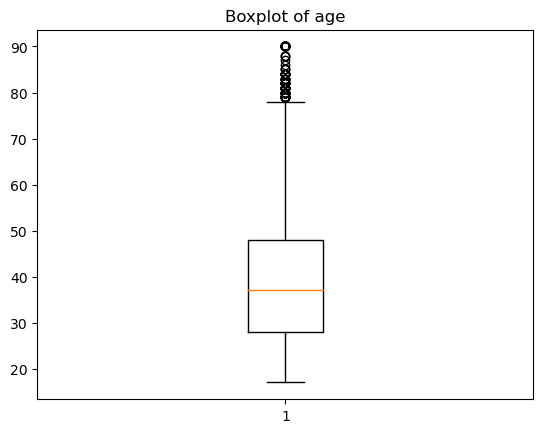

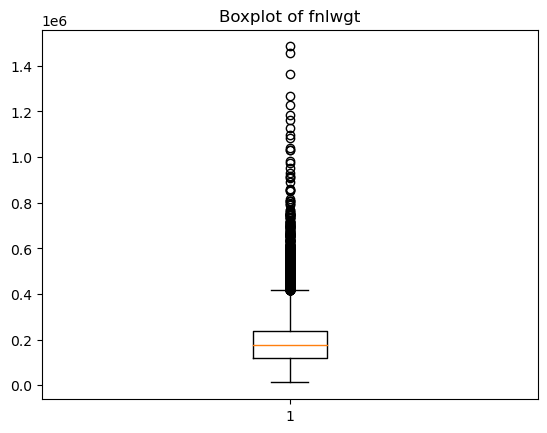

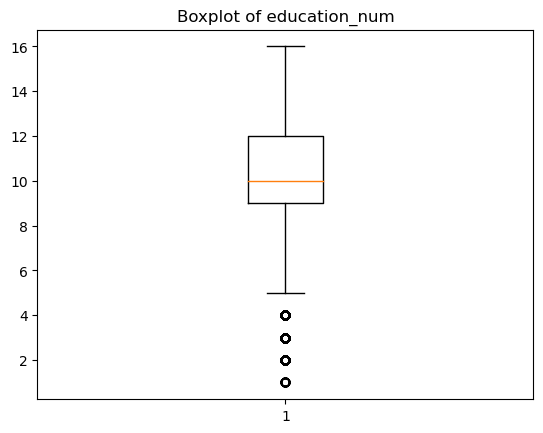

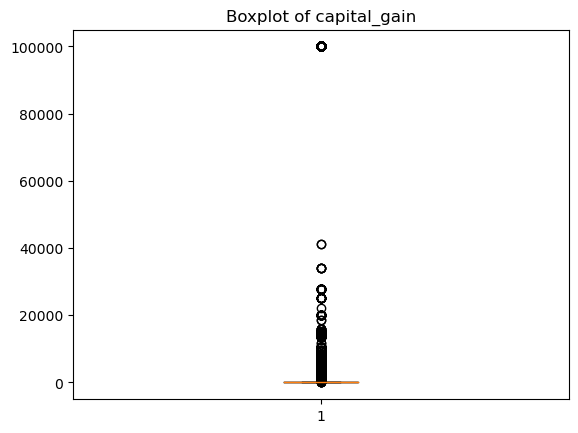

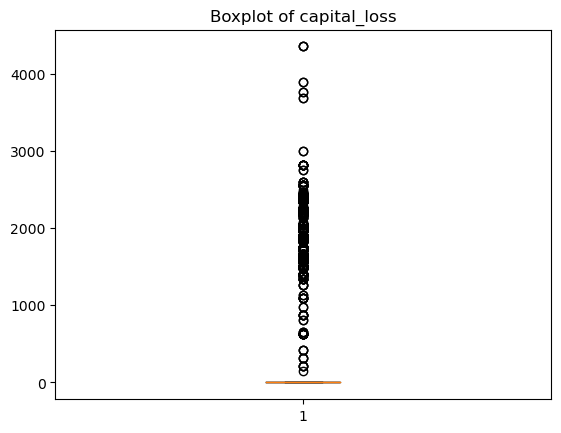

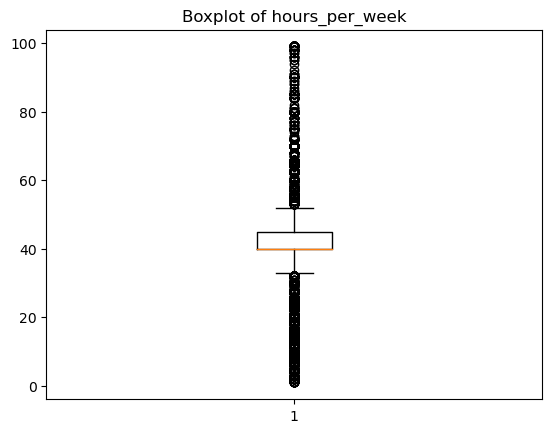

In [14]:
for column in num_col:
    plt.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [15]:
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [16]:
df1_num_col=df[num_col]

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder

In [18]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [19]:
df_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(df1_num_col), columns=num_col)
df_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(df1_num_col), columns=num_col)

In [20]:
df_scaled_standard

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


In [21]:
df_scaled_minmax

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


* Standard Scaling is preferred when preserving the mean and standard deviation of the features is important,and when outliers are present.
* Min-Max Scaling is suitable when normalizing the data to a fixed range is desired, or when dealing with non-Gaussian distributed data.

# 2.Encoding Techniques

In [22]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()

In [23]:
encoder_onehot=OneHotEncoder()
encoder_label=LabelEncoder()

In [24]:
df_encoded_onehot=pd.DataFrame()
df_encoded_label=df.copy()

In [25]:
for column in cat_col:
    num_categories=df[column].nunique()
    if num_categories<=5:
        # One-Hot encode for less than 5 categories
        encoded_feature=encoder_onehot.fit_transform(df[[column]])
        encoded_df=pd.DataFrame(encoded_feature.toarray(),columns=encoder_onehot.get_feature_names_out([column]))
        df_encoded_onehot=pd.concat([df_encoded_onehot,encoded_df],axis=1)
    else:
        # Label encode for more than 5 categories
        encoded_feature=encoder_label.fit_transform(df[column])
        df_encoded_label[column]=encoded_feature

In [26]:
df_encoded_onehot

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32532,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32533,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32534,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32535,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [27]:
df_encoded_label

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,White,Female,0,0,38,39,<=50K
32533,40,4,154374,11,9,2,7,0,White,Male,0,0,40,39,>50K
32534,58,4,151910,11,9,6,1,4,White,Female,0,0,40,39,<=50K
32535,22,4,201490,11,9,4,1,3,White,Male,0,0,20,39,<=50K


##### One-Hot Encoding:
* Pros:
* Retains all information about the categories.
* Works well with algorithms that can handle high-dimensional data.
* Cons:
* Increases the dimensionality of the dataset, which can be inefficient for large categorical variables.
* May result in a sparse matrix, which can be memory-intensive.
##### Label Encoding:
* Pros:
* Reduces dimensionality compared to one-hot encoding.
* Preserves the ordinal information if present in the categories.
* Cons:
* May introduce unintended ordinality where none exists, leading to potential bias in the model.
* Not suitable for categories without a natural ordinal relationship.

# 3.Feature Engineering:

In [28]:
from sklearn.preprocessing import FunctionTransformer

In [29]:
bins=[0,25,50,np.inf]
labels=['young','middle-aged','senior']
df['age_group']=pd.cut(df['age'],bins=bins,labels=labels)
df['capital_change']=df['capital_gain']-df['capital_loss']

In [30]:
transformer=FunctionTransformer(np.log1p,validate=True)
df['capital_gain_log']=transformer.transform(df[['capital_gain']])

In [31]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,capital_change,capital_gain_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,middle-aged,2174,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,middle-aged,0,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,middle-aged,0,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,senior,0,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,middle-aged,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,middle-aged,0,0.000000
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,middle-aged,0,0.000000
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,senior,0,0.000000
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,young,0,0.000000


# 4.Feature Selection:

In [32]:
from sklearn.ensemble import IsolationForest
import ppscore as pps

In [33]:
df_final=pd.concat([df_scaled_standard,df_scaled_minmax,df_encoded_onehot,df_encoded_label],axis=1)

In [34]:
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age,fnlwgt,education_num,capital_gain,...,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.301370,0.044302,0.800000,0.021740,...,4,1,1,White,Male,2174,0,40,39,<=50K
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.452055,0.048238,0.800000,0.000000,...,2,4,0,White,Male,0,0,13,39,<=50K
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.287671,0.138113,0.533333,0.000000,...,0,6,1,White,Male,0,0,40,39,<=50K
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.493151,0.151068,0.400000,0.000000,...,2,6,0,Black,Male,0,0,40,39,<=50K
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.150685,0.221488,0.800000,0.000000,...,2,10,5,Black,Female,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650,0.136986,0.166404,0.733333,0.000000,...,2,13,5,White,Female,0,0,38,39,<=50K
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664,0.315068,0.096500,0.533333,0.000000,...,2,7,0,White,Male,0,0,40,39,>50K
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664,0.561644,0.094827,0.533333,0.000000,...,6,1,4,White,Female,0,0,40,39,<=50K
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530,0.068493,0.128499,0.533333,0.000000,...,4,1,3,White,Male,0,0,20,39,<=50K


In [35]:
encoded_df=pd.get_dummies(df_final)

In [36]:
iso_forest=IsolationForest()
iso_forest.fit(encoded_df)

IsolationForest()

In [37]:
anomaly_scores=iso_forest.decision_function(encoded_df)

In [38]:
outliers=encoded_df[iso_forest.predict(encoded_df)==-1]

In [39]:
df_final_no_outliers=df_final.drop(outliers.index)

In [40]:
df_final_no_outliers

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age,fnlwgt,education_num,capital_gain,...,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.301370,0.044302,0.800000,0.02174,...,4,1,1,White,Male,2174,0,40,39,<=50K
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.452055,0.048238,0.800000,0.00000,...,2,4,0,White,Male,0,0,13,39,<=50K
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.287671,0.138113,0.533333,0.00000,...,0,6,1,White,Male,0,0,40,39,<=50K
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.493151,0.151068,0.400000,0.00000,...,2,6,0,Black,Male,0,0,40,39,<=50K
5,-0.116262,0.898122,1.523641,-0.145975,-0.216743,-0.035664,0.273973,0.184932,0.866667,0.00000,...,2,4,5,White,Female,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,-1.216148,1.140366,-0.031815,-0.145975,-0.216743,-0.035664,0.068493,0.202298,0.600000,0.00000,...,4,11,1,White,Male,0,0,40,39,<=50K
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650,0.136986,0.166404,0.733333,0.00000,...,2,13,5,White,Female,0,0,38,39,<=50K
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664,0.315068,0.096500,0.533333,0.00000,...,2,7,0,White,Male,0,0,40,39,>50K
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664,0.561644,0.094827,0.533333,0.00000,...,6,1,4,White,Female,0,0,40,39,<=50K


To mitigate the impact of outliers, various techniques can be employed, including data transformation, trimming, winsorization, outlier detection algorithms (like Isolation Forest), and robust statistical methods that are less sensitive to outliers. 
* Outliers can significantly impact model performance in various ways:

Skewing of Statistical Measures: Outliers can distort statistical measures such as mean and standard deviation, leading to biased estimates of central tendency and dispersion.
Impact on Parametric Models: Parametric models, such as linear regression, assume that the data follows a specific distribution. Outliers can violate these assumptions, resulting in models that are poorly fitted to the majority of the data.
Influence on Model Coefficients: Outliers can have a disproportionate influence on model coefficients, pulling the estimated coefficients towards them and affecting the interpretation of the model.
Decreased Predictive Accuracy: Outliers can introduce noise into the data, reducing the predictive accuracy of machine learning models. This is especially true for algorithms sensitive to noise, such as k-nearest neighbors and decision trees.
Increased Variance: Outliers can increase the variance of the model, making it less generalizable to new data. This can lead to overfitting, where the model learns to capture the noise in the data rather than the underlying patterns.
Misleading Conclusions: Outliers may represent rare events or measurement errors rather than true patterns in the data. Ignoring or mishandling outliers can lead to incorrect conclusions and decisions.
Violation of Assumptions: Outliers may violate the assumptions of certain statistical tests or machine learning algorithms, such as the assumption of normality in hypothesis testing or the assumption of homoscedasticity in linear regression.

In [41]:
pps_matrix=pps.matrix(df)

In [42]:
non_numeric_cols=df.select_dtypes(exclude=['int','float']).columns.tolist()
df_numeric=df.drop(non_numeric_cols,axis=1)
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
for col in non_numeric_cols:
    df[col]=label_encoder.fit_transform(df[col])
pps_matrix=pps.matrix(df_numeric)
correlation_matrix=df_numeric.corr()

In [43]:
pps_matrix_numeric=pps_matrix.apply(pd.to_numeric,errors='coerce')
print(pps_matrix_numeric.dtypes)

x                 float64
y                 float64
ppscore           float64
case              float64
is_valid_score       bool
metric            float64
baseline_score    float64
model_score       float64
model             float64
dtype: object


In [44]:
pps_matrix_numeric=pps_matrix_numeric.astype(float)

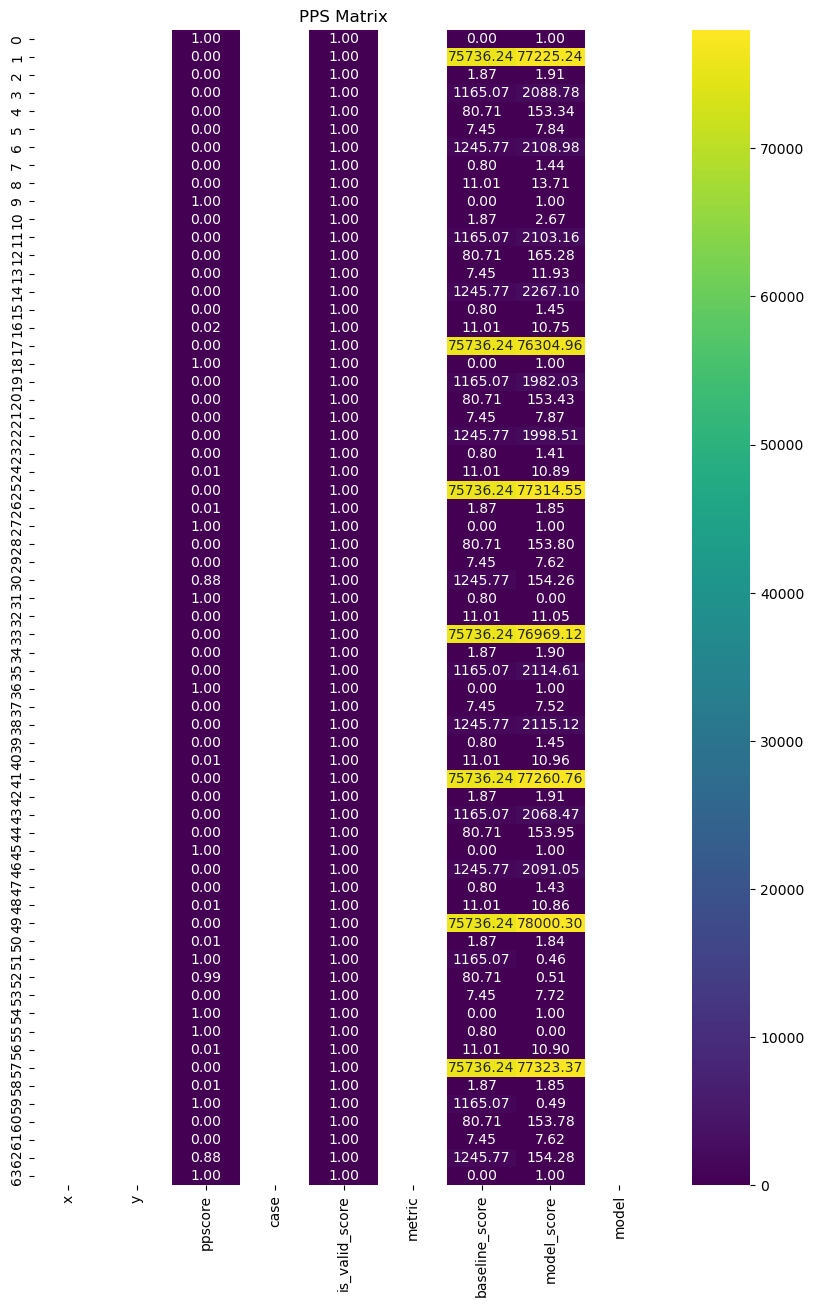

In [45]:
plt.figure(figsize=(10,15))
sns.heatmap(pps_matrix_numeric,annot=True,cmap='viridis',fmt=".2f")
plt.title('PPS Matrix')
plt.show()

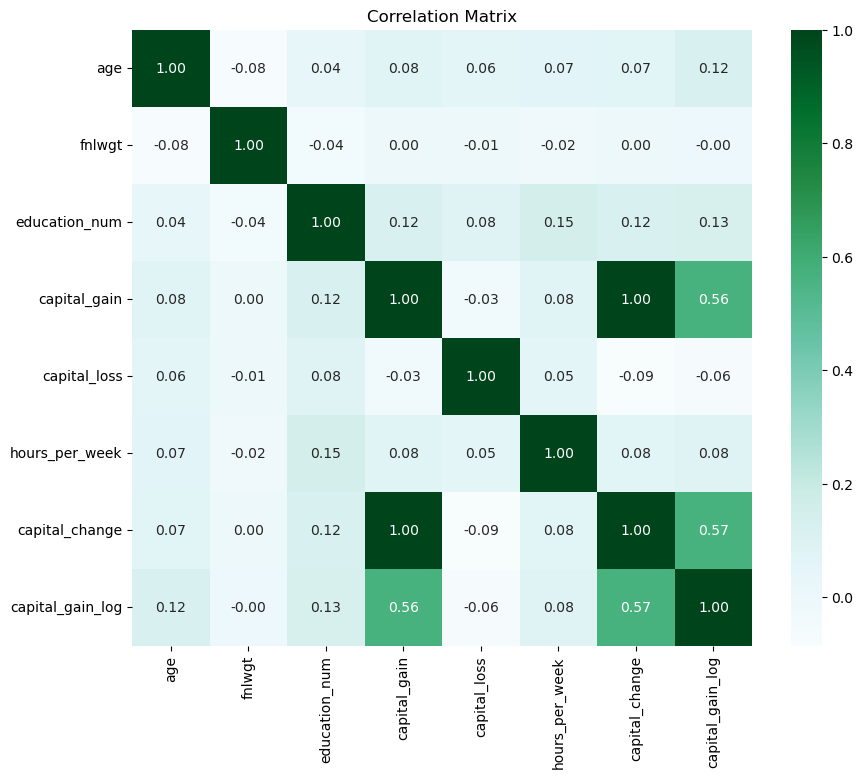

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='BuGn',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()